In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import os

In [5]:
df = pd.read_csv(r"C:\Users\devpr\Desktop\da projects\clean_sales_data.csv")

In [23]:
df_eda = df.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           185686 non-null  int64  
 1   product            185686 non-null  object 
 2   quantity           185686 non-null  int64  
 3   sell_price         185686 non-null  float64
 4   order_date_time    185686 non-null  object 
 5   address            185686 non-null  object 
 6   month_num          185686 non-null  int64  
 7   amount             185686 non-null  float64
 8   city               185686 non-null  object 
 9   order_hour_num     185686 non-null  int64  
 10  month_name         185686 non-null  object 
 11  day_name           185686 non-null  object 
 12  quarter            185686 non-null  int64  
 13  day                185686 non-null  int64  
 14  date               185686 non-null  object 
 15  time               185686 non-null  object 
 16  we

In [29]:
total_revenue = df_eda['amount'].sum()
print(f'Total Business Revenue in 2019: ${total_revenue:,.2f}')

Total Business Revenue in 2019: $34,465,537.94


In [39]:
total_orders = df_eda['order_id'].nunique()
print(f'Total Orders Placed in 2019: {total_orders:,} Orders')

Total Orders Placed in 2019: 178,437 Orders


In [105]:
total_quantity = df_eda['quantity'].sum()
print(f'Total Quantity or Units sold in 2019: {total_quantity:,} Units')

Total Quantity or Units sold in 2019: 208,812 Units


In [45]:
avg_order_value = df_eda.groupby('order_id')['amount'].sum().mean()
print(f'Average Order Value in 2019: ${avg_order_value:,.2f}')

Average Order Value in 2019: $193.15


In [243]:
monthly_report = df_eda.groupby(['month_num', 'month_name']).agg(
    m_revenue = ('amount','sum'),
    m_orders = ('order_id','nunique'),
    m_quantity = ('quantity','sum')
)
monthly_report = monthly_report.reset_index()
monthly_report['m_pct'] = (monthly_report['m_revenue']/total_revenue *100).round(2)
monthly_report['m_revenue_rank'] = monthly_report['m_revenue'].rank(method = 'dense', ascending = False).astype(int)
monthly_report.to_csv('monthly_report.csv', index = False)

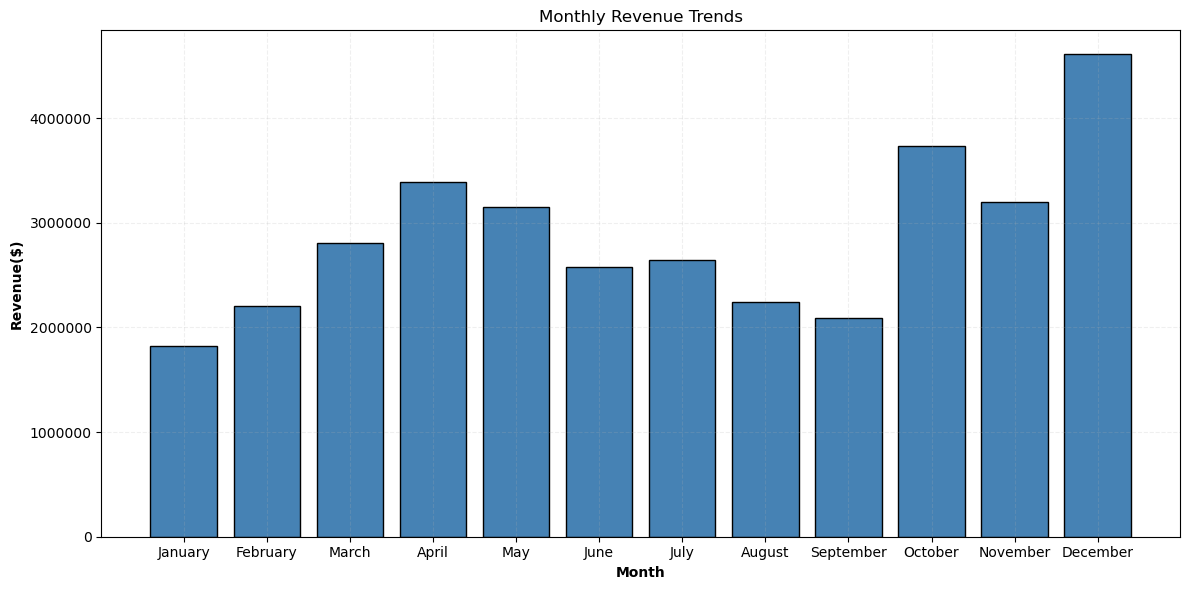

In [139]:
plt.figure(figsize = (12,6))
plt.bar(monthly_report['month_name'], monthly_report['m_revenue'], color = 'steelblue', edgecolor = 'black')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Revenue($)', fontweight = 'bold')
plt.title('Monthly Revenue Trends')
plt.grid(True, alpha = 0.2, linestyle = '--')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()

plt.savefig('monthly_report.png', dpi = 300, bbox_inches = 'tight')

plt.show()


In [102]:
top_5_months = monthly_report.sort_values('m_revenue', ascending = False).head(5)
print(f"Top 5 Moths {top_5_months['month_name'].tolist()} had generated {((top_5_months['m_revenue'].sum()/total_revenue)*100).round(2)}% of Total Revenue")

Top 5 Moths ['December', 'October', 'April', 'November', 'May'] had generated 52.46% of Total Revenue


In [109]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           185686 non-null  int64  
 1   product            185686 non-null  object 
 2   quantity           185686 non-null  int64  
 3   sell_price         185686 non-null  float64
 4   order_date_time    185686 non-null  object 
 5   address            185686 non-null  object 
 6   month_num          185686 non-null  int64  
 7   amount             185686 non-null  float64
 8   city               185686 non-null  object 
 9   order_hour_num     185686 non-null  int64  
 10  month_name         185686 non-null  object 
 11  day_name           185686 non-null  object 
 12  quarter            185686 non-null  int64  
 13  day                185686 non-null  int64  
 14  date               185686 non-null  object 
 15  time               185686 non-null  object 
 16  we

In [244]:
#4.3 Weekly Sales Pattern Analysis
weekly_report = df_eda.groupby(['weekday_num', 'day_name']).agg(
    w_revenue = ('amount','sum'),
    w_orders = ('order_id','nunique'),
    w_quantity = ('quantity','sum')
)
weekly_report = weekly_report.reset_index()
weekly_report['w_pct'] = (weekly_report['w_revenue']/total_revenue *100).round(2)
weekly_report['w_revenue_rank'] = weekly_report['w_revenue'].rank(method = 'dense', ascending = False).astype(int)
weekly_report.to_csv('weekly_report.csv', index = False)

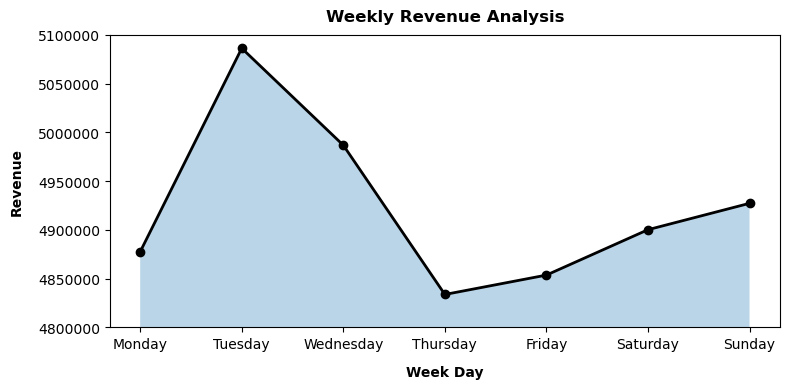

In [147]:
plt.figure(figsize = (8,4))
plt.fill_between(weekly_report['day_name'], weekly_report['w_revenue'], alpha = 0.3)
plt.plot(weekly_report['day_name'], weekly_report['w_revenue'], linewidth = 2, marker = 'o', color = 'black')
plt.ylim(4800000, 5100000)
plt.xlabel('Week Day', fontweight = 'bold', labelpad = 10)
plt.ylabel('Revenue', fontweight = 'bold', labelpad = 10)
plt.title('Weekly Revenue Analysis', fontweight = 'bold' , pad = 10)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.tight_layout()
plt.savefig('weekly_report.png', dpi = 300,bbox_inches = 'tight' )
plt.show()

In [149]:
top_2_days = weekly_report.sort_values('w_revenue', ascending = False).head(2)
print(f"Top 2 days {top_2_days['day_name'].tolist()} had generated {((top_2_days['w_revenue'].sum()/total_revenue)*100).round(2)}% of Total Revenue")

Top 2 days ['Tuesday', 'Wednesday'] had generated 29.23% of Total Revenue


In [187]:
#4.4 Product Performance Analysis
product_report = df_eda.groupby(['category','product']).agg(
    p_revenue = ('amount', 'sum'),
    p_avg_revenue = ('amount', 'mean'),
    p_quantity = ('quantity', 'sum'),
    p_orders = ('order_id', 'nunique'),
    p_cost_price = ('cost_price', 'mean'),
    p_sell_price = ('sell_price','mean'),
    P_profit_margin_pct = ('profit_margin_pct','mean')
)
product_report['revenue_pct'] = product_report['p_revenue']/total_revenue *100
product_report = product_report.reset_index().round(2)
product_report['p_rank'] = product_report['p_revenue'].rank(method = 'dense', ascending = False)
top_5_products = product_report.sort_values(by = ['p_rank']).head(5)
top_5_products.reset_index()

,index,category,product,p_revenue,p_avg_revenue,p_quantity,p_orders,p_cost_price,p_sell_price,P_profit_margin_pct,revenue_pct,p_rank
0,11,Laptop,Macbook Pro Laptop,8032500.00,1701.44,4725,4721,1278.95,1700.00,24.77,23.31,1.0
1,18,Phone,iPhone,4792900.00,700.72,6847,6840,525.52,700.00,24.93,13.91,2.0
2,12,Laptop,ThinkPad Laptop,4127958.72,1000.47,4128,4126,748.26,999.99,25.17,11.98,3.0
3,15,Phone,Google Phone,3317400.00,600.76,5529,5522,450.04,600.00,24.99,9.63,4.0
4,8,Computers,27in 4K Gaming Monitor,2433147.61,390.87,6239,6225,292.18,389.99,25.08,7.06,5.0


In [185]:
print(f'Top 5 Products {top_5_products['product'].tolist()} contributes {top_5_products['revenue_pct'].sum()}% of Total Revenue')

Top 5 Products ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor'] contributes 65.89% of Total Revenue


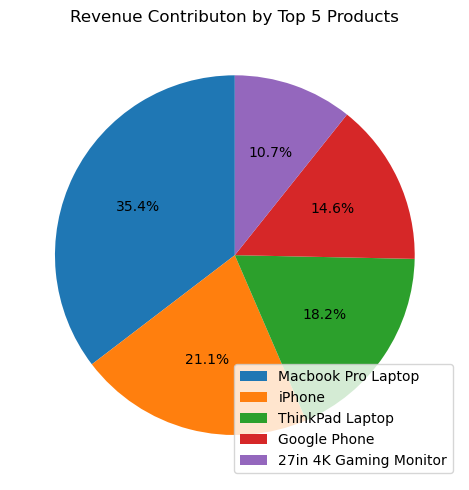

In [204]:
plt.figure(figsize = (5,5))
plt.pie(top_5_products['revenue_pct'], autopct = '%1.1f%%',startangle = 90)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.legend(top_5_products['product'])
plt.title('Revenue Contributon by Top 5 Products')
plt.tight_layout()
plt.savefig('Top 5 Products Report.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [212]:
#4.5 Profit Analysis
quarter_report = df_eda.groupby('quarter').agg(
    q_revenue = ('amount', 'sum'),
    q_avg_revenue = ('amount', 'mean'),
    q_quantity = ('quantity', 'sum'),
    q_orders = ('order_id', 'nunique'),
    q_profits = ('profit', 'sum')
)
quarter_report = quarter_report.reset_index()


In [245]:
quarter_report['q_pct'] = (quarter_report['q_profits']/(quarter_report['q_profits'].sum())*100)
quarter_report['q_pct_change'] = quarter_report['q_pct'].pct_change().fillna(0)*100
quarter_report = quarter_report.round(2)
quarter_report.to_csv('quarter_report.csv', index = True)

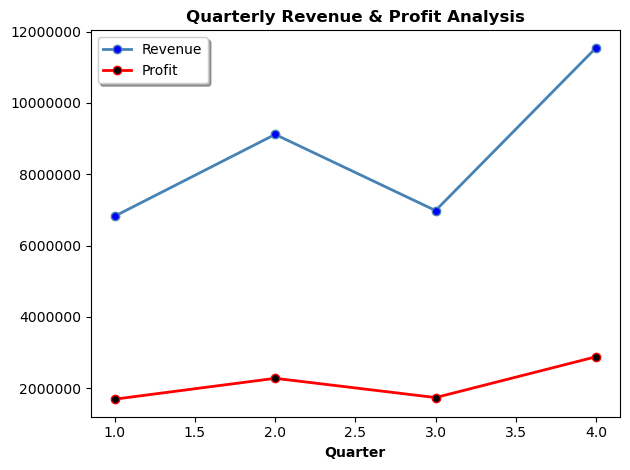

In [242]:
#Quarterly revenue and Profit Trend

plt.plot(quarter_report['quarter'],quarter_report['q_revenue'],color = 'steelblue', marker = 'o', label = 'Revenue', markerfacecolor = 'blue', linewidth = 2)
plt.plot(quarter_report['quarter'],quarter_report['q_profits'],color = 'red', marker = 'o', label = 'Profit', markerfacecolor = 'black', linewidth = 2)

plt.xlabel('Quarter', fontweight = 'bold')
plt.title('Quarterly Revenue & Profit Analysis', fontweight = 'bold')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(shadow = True)
plt.tight_layout()
plt.savefig('Revenue and Profit.png', dpi = 300, bbox_inches = 'tight')
plt.show()